# BEE 4750 Homework 2: Systems Modeling and Simulation

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 09/19/24, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to derive a model for water quality in a river
    system and use this model to check for regulatory compliance.
-   Problem 2 asks you to explore the dynamics and equilibrium stability
    of the shallow lake model under a particular set of parameter
    values.
-   Problem 3 (5750 only) asks you to modify the lake eutrophication
    example from Lecture 04 to account for atmospheric deposition.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\helen\OneDrive\Documents\BEE 4750\hw2-hbd8`


In [2]:
using Plots
using LaTeXStrings
using CSV
using DataFrames
using Roots

## Problems (Total: 50/60 Points)

### Problem 1 (25 points)

A river which flows at 10 km/d is receiving discharges of wastewater
contaminated with CRUD from two sources which are 15 km apart, as shown
in the Figure below. CRUD decays exponentially in the river at a rate of
0.36 $\mathrm{d}^{-1}$.

<figure>
<img src="attachment:figures/river_diagram.png"
alt="Schematic of the river system in Problem 1" />
<figcaption aria-hidden="true">Schematic of the river system in Problem
1</figcaption>
</figure>

**In this problem**:

-   Assuming steady-state conditions, derive a model for the
    concentration of CRUD downriver by solving the appropriate
    differential equation(s) analytically.
-   Determine if the system in compliance with a regulatory limit of 2.5
    kg/(1000 m$^3$).

In [13]:

function findconcentration(d)
    if d < 15
        #before second mixing point initial concentration is lower
        M = 485 .* exp(-0.036 * d)
        C = M/290 #kg/m^3
    else 
        #add additional pollution to initial concentration
        M = 702.63 .* exp(-0.036 * d)
        C = M/350 #kg/m^3
    end
end
#print concentrations at two highest points
print(findconcentration(0))
print("   ")
print(findconcentration(15))



1.6724137931034482   1.1698754416158184

> **Tip**
>
> Formulate your model in terms of distance downriver, rather than
> leaving it in terms of time from discharge.

### Problem 2 (25 points)

Consider the shallow lake model from class:

$$
\begin{aligned}
X_{t+1} &= X_t + a_t + y_t + \frac{X_t^q}{1 + X_t^q} - bX_t, \\
y_t &\sim \text{LogNormal}(\mu, \sigma^2),
\end{aligned}
$$

where:

-   $X_t$ is the lake phosphorous (P) concentration at time $t$;
-   $a_t$ is the point-source P release at time $t$;
-   $y_t$ is the non-point-source P release at time $t$, which is
    treated as random from a LogNormal distribution with mean $\mu$ and
    standard deviation $\sigma$;
-   $b$ is the linear rate of P outflow;
-   $q$ is a parameter influencing the rate of P recycling from the
    sediment.

**In this problem**:

-   Make an initial conditions plot for the model dynamics for $b=0.5$,
    $q=1.5$, $y_t=0$, and $a_t=0$ for $t=0, \ldots, 30$. What are the
    equilibria? What can you say about the resilience of the system?

    > **Finding equilibria**
    >
    > Use [`Roots.jl`](https://juliamath.github.io/Roots.jl/stable/) to
    > find the equilibria by solving for values where $X_{t+1} = X_t$.
    > For example, if you have functions `X_outflow(X,b)` and
    > `X_recycling(X,q)`, you could create a function
    > `X_delta(x, a) = a + X_recycling(x) - X_outflow(x)` and call
    > `Roots.find_zero(x -> X_delta(x, a), x₀)`, where `x₀` is an
    > initial value for the search (you might need to use your plot to
    > find values for `x₀` near each of the “true” equilibria).

-   Repeat the analysis with $a_t=0.02$ for all $t$. What are the new
    equilibria? How have the dynamics and resilience of the system
    changed?

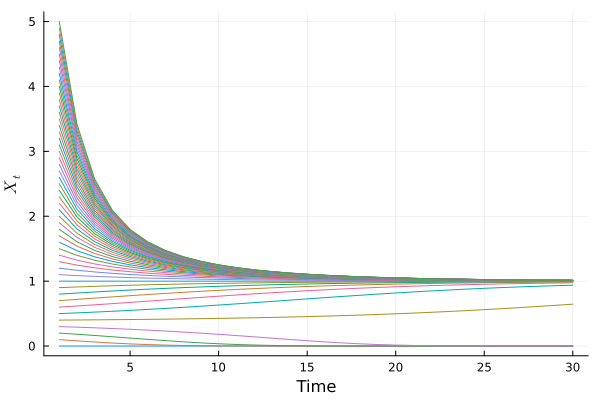

In [21]:
#Below answer is heavily based on the code used in lecture with minor modifications to better fit the problem

#define recycling and outflow equations
X_recycling(x, q) = x.^q ./ (1 .+ x.^q);
X_outflow(x,b) = b.* x;

#Use recycling and outflow equations to find values given intial x and other inputs
T = 30
x_vals = collect(0.0:0.1:5)
function simulate_X(x0, T, b, q, a, y)
    x = zeros(T)
    x[1] = x0
    for t=2:T
        x[t] = x[t-1] .+ a .+ y .+ X_recycling(x[t-1],q) .- X_outflow(x[t-1],b)
    end
    return x
end
#Use simulation to find values for every x, graph
x = map(x -> simulate_X(x, T, 0.5,1.5,0,0), x_vals)
x_noinflow = plot(x, label = false, ylabel = L"X_t", xlabel = "Time")


In [24]:
x_delta(x, a) = a + X_recycling(x, 1.5) - X_outflow(x, 0.5)
Roots.find_zero(x -> x_delta(x, 0), 1)

1.0

In [25]:
x_delta(x, a) = a + X_recycling(x, 1.5) - X_outflow(x, 0.5)
Roots.find_zero(x -> x_delta(x, 0), 0.6)

0.3819660112501052

In [26]:
x_delta(x, a) = a + X_recycling(x, 1.5) - X_outflow(x, 0.5)
Roots.find_zero(x -> x_delta(x, 0), 0)

0.0

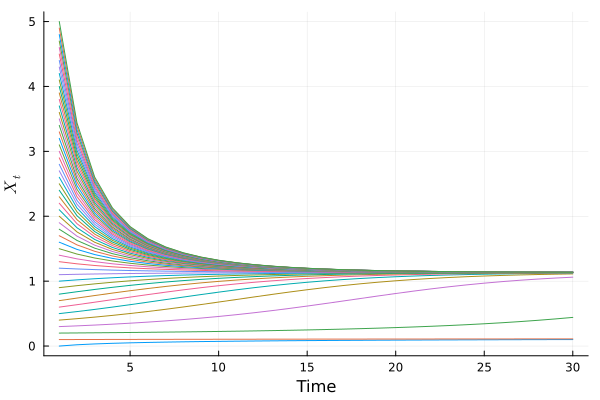

In [27]:
#heavily based on in-class example code

#Define recycling and outflow equations
X_recycling(x, q) = x.^q ./ (1 .+ x.^q);
X_outflow(x,b) = b.* x;

#find values for a given x0 based on inputs
T = 30
x_vals = collect(0.0:0.1:5)
function simulate_X(x0, T, b, q, a, y)
    x = zeros(T)
    x[1] = x0
    for t=2:T
        x[t] = x[t-1] .+ a .+ y .+ X_recycling(x[t-1],q) .- X_outflow(x[t-1],b)
    end
    return x
end
#determine each result at each time given each x0 value and graph
x = map(x -> simulate_X(x, T, 0.5,1.5,0.02,0), x_vals)
x_noinflow = plot(x, label = false, ylabel = L"X_t", xlabel = "Time")

In [28]:
x_delta(x, a) = a + X_recycling(x, 1.5) - X_outflow(x, 0.5)
Roots.find_zero(x -> x_delta(x, 0.02), 0)

0.1162444196607475

In [29]:
x_delta(x, a) = a + X_recycling(x, 1.5) - X_outflow(x, 0.5)
Roots.find_zero(x -> x_delta(x, 0.02), 0.5)

0.15442860418310417

In [30]:
x_delta(x, a) = a + X_recycling(x, 1.5) - X_outflow(x, 0.5)
Roots.find_zero(x -> x_delta(x, 0.02), 1)

1.1341008852434813

### Problem 3 (10 points)

**This problem is only required for students in BEE 5750**.

Consider the lake eutrophication example from [Lecture
04](https://viveks.me/environmental-systems-analysis/slides/lecture03-1-eutrophication-modeling.html#/title-slide).
Suppose that phosphorous is also atmospherically deposited onto the lake
surface at a rate of
$1.6 \times 10^{-4} \mathrm{kg/(yr} \cdot \mathrm{m}^2)$, which is then
instantly mixed into the lake. Derive a model for the lake phosphorous
concentration and find the maximum allowable point source phosphorous
loading if the goal is to keep lake concentrations below 0.02 mg/L.

## References

List any external references consulted, including classmates.